### Name - Rishabh Pathak
### Assignment - Assignment 2.1

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [39]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";", low_memory=False)

In [40]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [41]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [42]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [43]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [44]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Drop the original 'Date' and 'Time' columns as they're now redundant
df.drop(columns=['Date', 'Time'], inplace=True)

In [45]:
#convert all data columns to numeric types
numeric_columns = df.columns.difference(['Datetime'])  # Exclude the 'Datetime' column
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [46]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [47]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Date                             object
Time                             object
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [51]:
df.Date[0]

datetime.date(2006, 12, 16)

In [52]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [53]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

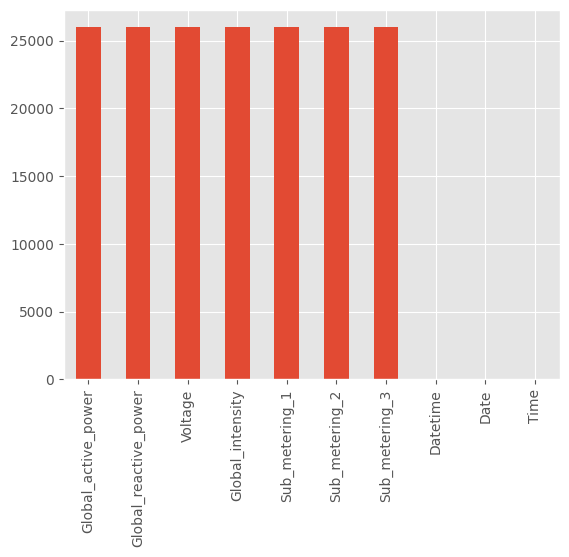

In [54]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

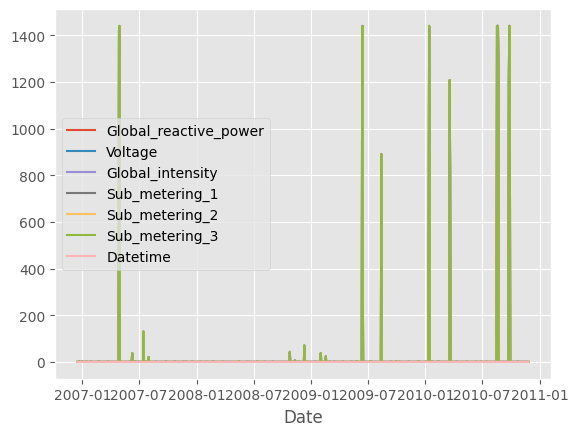

In [55]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A: By visualizing the missing data with df.isna().sum().plot.bar() and grouping it by Date, we can notice patterns such as:

- Missing data may cluster on specific dates or times.
- There might be systemic issues (e.g., entire days or blocks of time missing) or random missing points.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: The best method depends on the data and context:

- Remove Rows:
If the proportion of missing data is small, removing rows with missing values can be reasonable.
This avoids introducing bias from imputed values.
- Impute Missing Values:
If missing data is substantial or systematic, imputation is better.
Options:
Use mean or median for numeric columns (best for normally distributed or skewed data).
Use interpolation (e.g., linear interpolation) for time series data.
Imputation ensures data continuity, especially for analysis requiring consistent data points.


**TODO:Use your preferred method to remove or impute a value for the missing data**

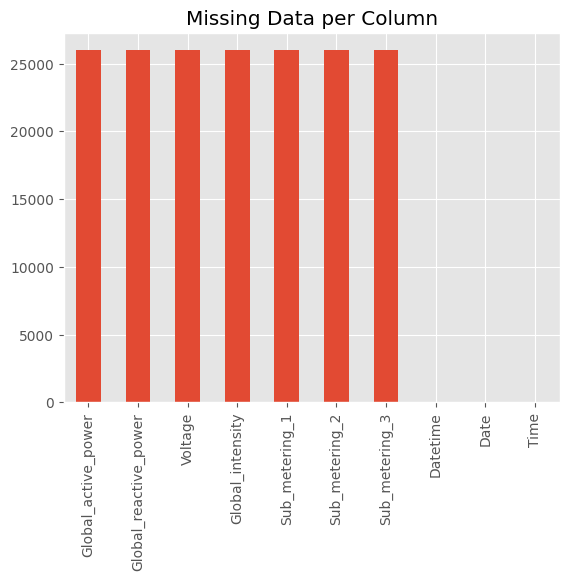

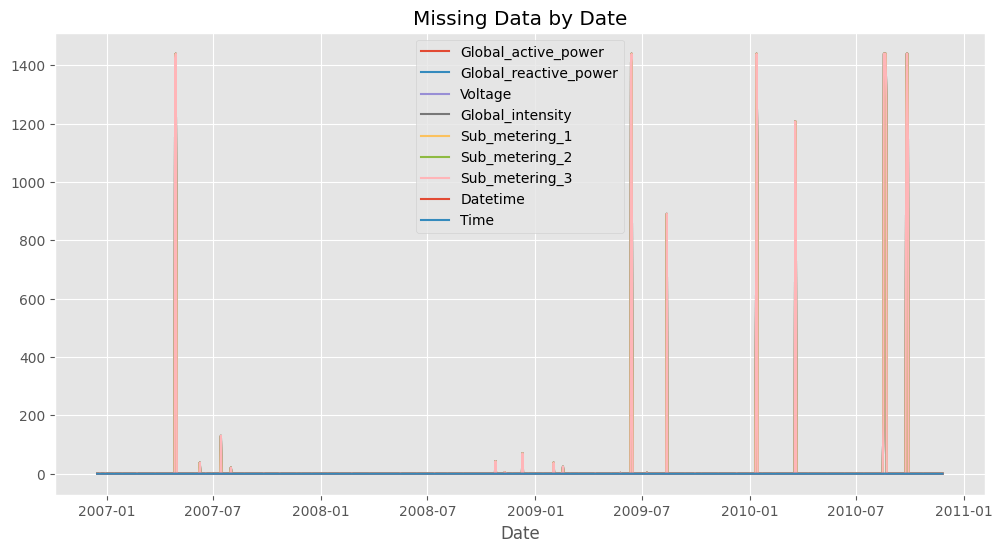

Missing Data After Imputation:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Date                     0
Time                     0
dtype: int64


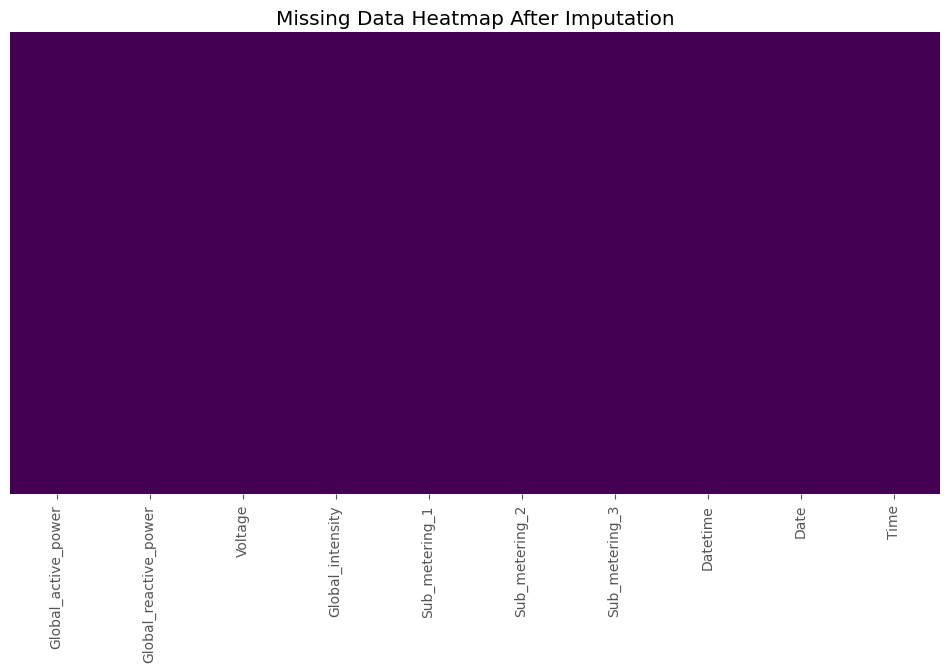

In [56]:
# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize total missing values for each column
df.isna().sum().plot.bar(title="Missing Data per Column")
plt.show()

# Group missing data by Date and plot
df_na = df.drop("Date", axis=1).isna().groupby(df.Date, sort=False).sum().reset_index()
df_na.plot(x="Date", y=df_na.columns[1:], figsize=(12, 6), title="Missing Data by Date")
plt.show()

# TODO: Handle Missing Data
# Impute missing values using linear interpolation
df[numeric_columns] = df[numeric_columns].interpolate(method='linear', limit_direction='forward', axis=0)

# Verify if missing data remains
print("Missing Data After Imputation:")
print(df.isna().sum())

# Final visualization after handling missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Data Heatmap After Imputation")
plt.show()



In [19]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0903,0.1236,240.8328,4.6215,1.1095,1.2892,6.4424,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3100,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6140,0.1000,241.0000,2.7516,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8700,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0526,0.1124,3.2378,4.4244,6.1158,5.7866,8.4159,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I chose the following four variables for visualization:

- Global_active_power: Represents the household’s power consumption in kilowatts. It's the primary metric of interest.
- Voltage: Represents the voltage level. This can help identify stability in power delivery and its impact on power consumption.
- Global_reactive_power: Indicates the power that flows back to the grid, showing efficiency and reactive load.
- Sub_metering_1: Measures energy consumption for specific household activities. It’s useful for analyzing usage patterns.

#### Reason -
These variables are interesting because they provide a holistic view of power consumption patterns, efficiency, and stability over time. Comparing them can uncover relationships, such as how voltage fluctuations might influence active or reactive power.

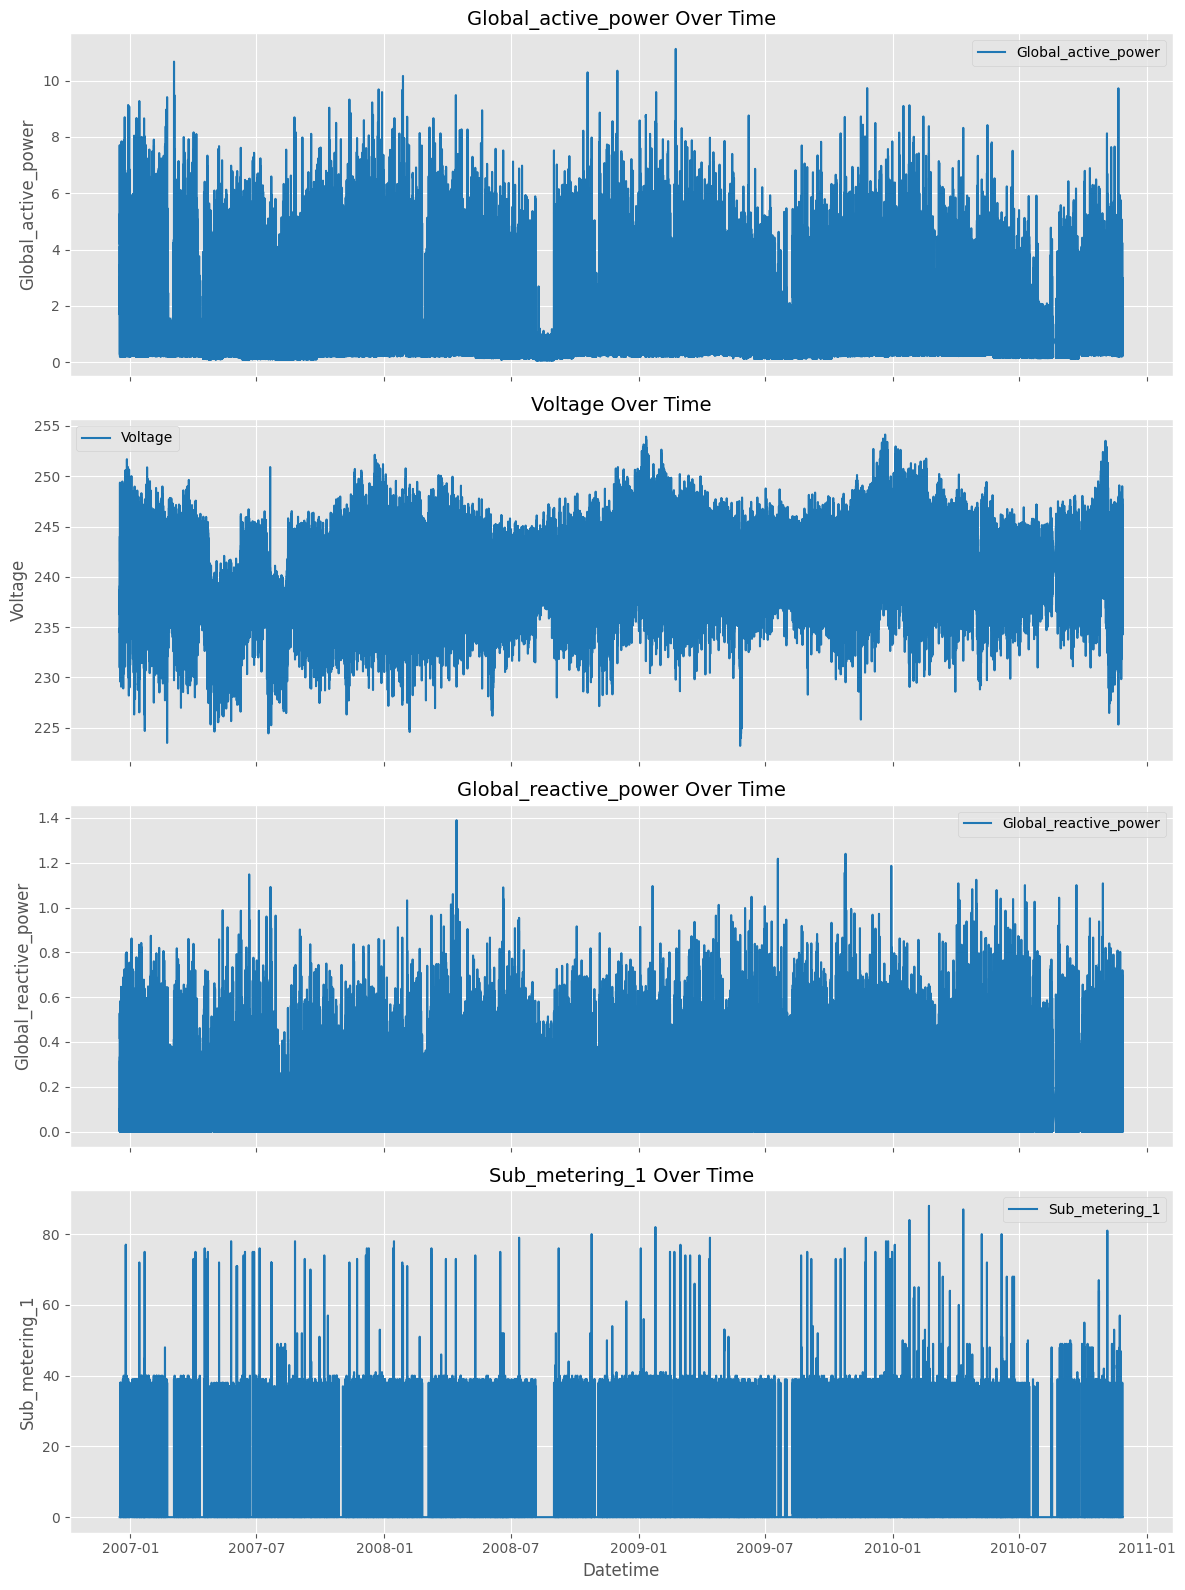

In [21]:
import matplotlib.pyplot as plt

# Variables to visualize
variables_to_plot = ['Global_active_power', 'Voltage', 'Global_reactive_power', 'Sub_metering_1']

# Set plot style (ensure it's available in your Matplotlib version)
plt.style.use('ggplot')  # Replace with an available style from plt.style.available

# Plot each variable in a separate subplot
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(12, 16), sharex=True)

for i, var in enumerate(variables_to_plot):
    axes[i].plot(df['Datetime'], df[var], label=var, color='tab:blue')
    axes[i].set_title(f"{var} Over Time", fontsize=14)
    axes[i].set_ylabel(var)
    axes[i].legend()
    axes[i].grid(True)

# Configure the shared X-axis
axes[-1].set_xlabel('Datetime', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: The raw data visualization shows how each variable evolves over time, which is useful for identifying trends, seasonality, and outliers. However, because the data likely includes a high frequency of measurements (such as hourly or minute-level), the raw data might appear noisy or too detailed to easily interpret long-term patterns. For this reason, visualizing raw data directly may not be the most effective method for understanding overarching trends. A smoothed or averaged representation, like a monthly or yearly average, can make trends easier to spot.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [28]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Add columns for the year and month
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month

# Compute the monthly average for each variable
monthly_avg = df.groupby(['Year', 'Month'])[variables_to_plot].mean()
print(monthly_avg)

            Global_active_power     Voltage  Global_reactive_power  \
Year Month                                                           
2006 12                1.901564  241.440787               0.131398   
2007 1                 1.546086  240.904805               0.132682   
     2                 1.401211  240.519176               0.113636   
     3                 1.318609  240.513516               0.114749   
     4                 0.845583  239.055733               0.120865   
     5                 0.985862  235.178364               0.115343   
     6                 0.827179  238.876587               0.146415   
     7                 0.668344  237.678029               0.128088   
     8                 0.764350  237.934728               0.112813   
     9                 0.969487  239.423884               0.126023   
     10                1.103974  239.725872               0.093453   
     11                1.294493  240.869300               0.096551   
     12             

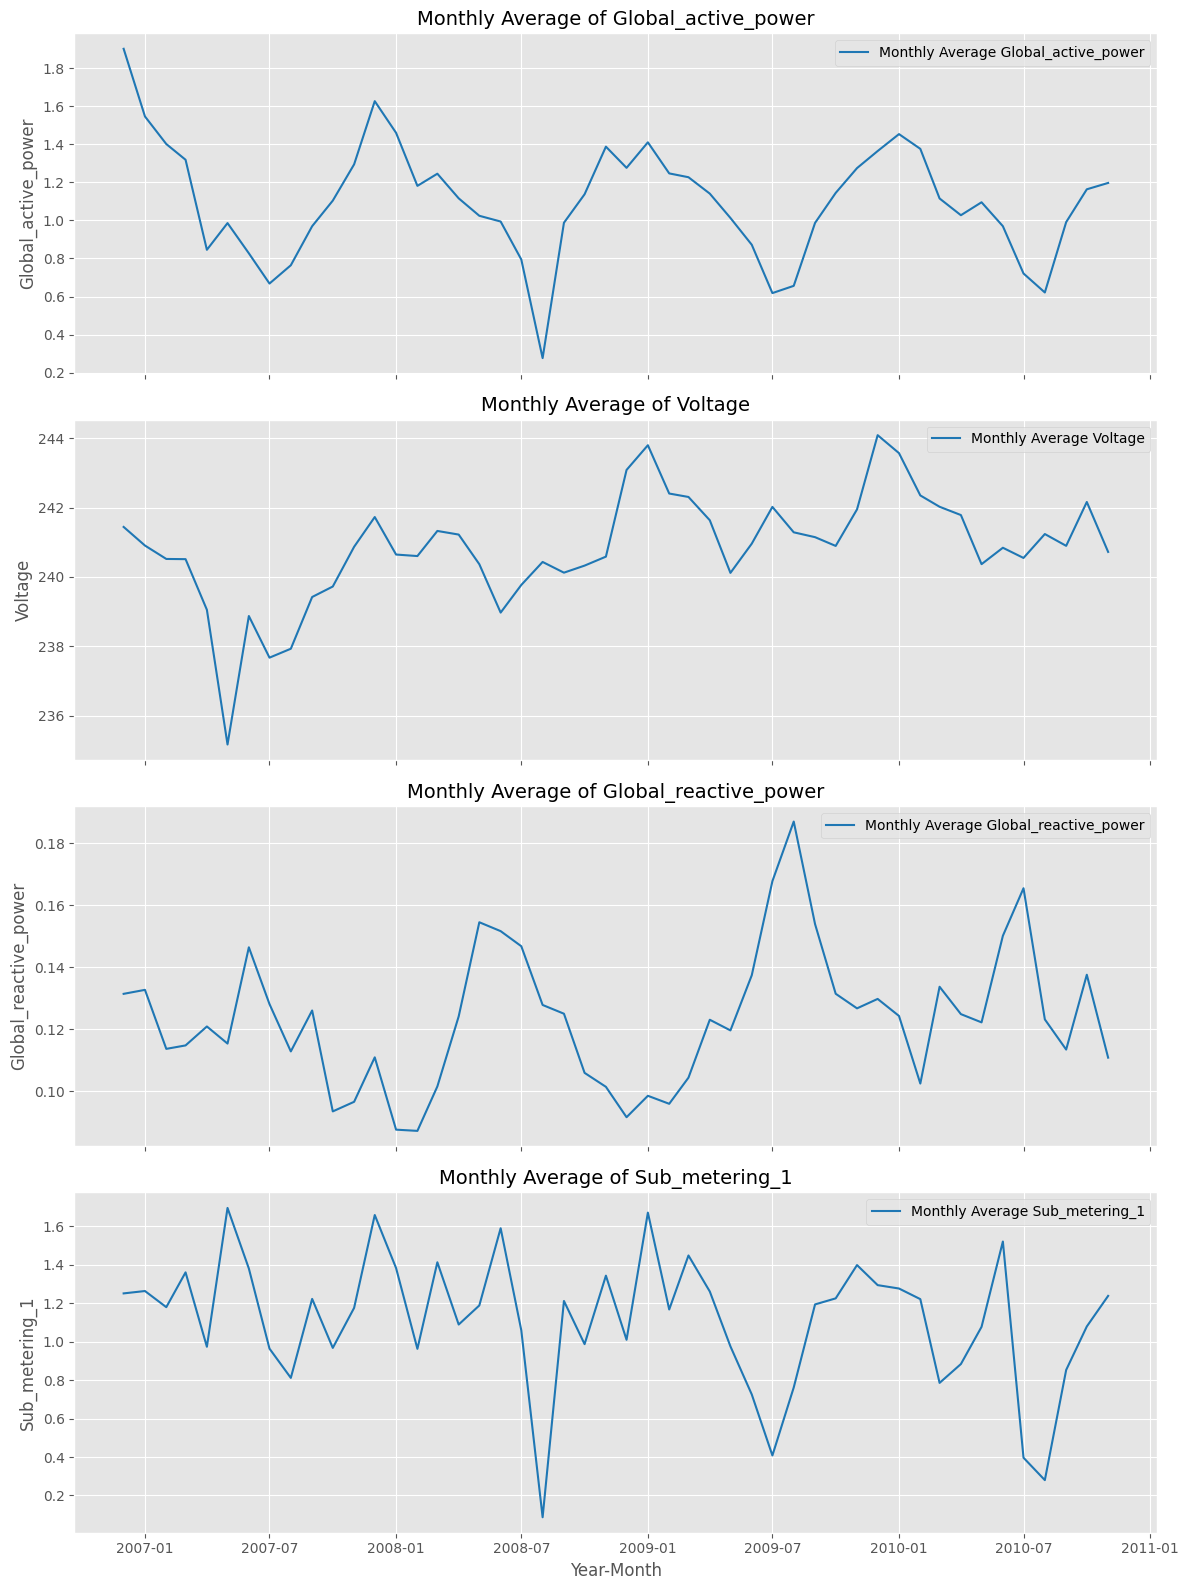

In [29]:
# Reset index to properly access the datetime for plotting
monthly_avg = monthly_avg.reset_index()

# Combine the Year and Month to create a single datetime-like index for plotting
monthly_avg['Year_Month'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(DAY=1))

# Plot the monthly averages
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(12, 16), sharex=True)

for i, var in enumerate(variables_to_plot):
    axes[i].plot(monthly_avg['Year_Month'], monthly_avg[var], label=f"Monthly Average {var}", color='tab:blue')
    axes[i].set_title(f"Monthly Average of {var}", fontsize=14)
    axes[i].set_ylabel(var)
    axes[i].legend()
    axes[i].grid(True)

# Configure the shared X-axis
axes[-1].set_xlabel('Year-Month', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Based on the monthly average plot, we can identify potential trends and correlations between the variables. Typically, variables like Global_active_power, Voltage, and Sub_metering_1 may exhibit similar seasonal or cyclical patterns if they are influenced by the same underlying factors, such as electricity usage, time of day, or seasons. For instance:

Global Active Power might show higher values during colder months (winter) due to increased heating, while Voltage might be more stable, though it could have small fluctuations tied to grid demand or supply.
Sub_metering_1, which represents a particular type of energy consumption, might follow a similar trend to Global_active_power, showing peaks during high-usage periods.
Overall, if two variables exhibit similar up and down trends over time, they could be considered as moving together, indicating potential relationships between them.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [30]:
#compute your moving average here
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as the index for rolling operation
df.set_index('Datetime', inplace=True)

# Define window size for moving average (30 days)
window_size = 30

# Compute 30-day moving average for each variable
moving_avg = df[variables_to_plot].rolling(window=window_size).mean()

print(moving_avg)

                     Global_active_power     Voltage  Global_reactive_power  \
Datetime                                                                      
2006-12-16 17:24:00                  NaN         NaN                    NaN   
2006-12-16 17:25:00                  NaN         NaN                    NaN   
2006-12-16 17:26:00                  NaN         NaN                    NaN   
2006-12-16 17:27:00                  NaN         NaN                    NaN   
2006-12-16 17:28:00                  NaN         NaN                    NaN   
...                                  ...         ...                    ...   
2010-11-26 20:58:00             0.971133  238.936667                 0.0348   
2010-11-26 20:59:00             0.970667  238.975000                 0.0348   
2010-11-26 21:00:00             0.969267  238.988000                 0.0348   
2010-11-26 21:01:00             0.967667  239.000333                 0.0348   
2010-11-26 21:02:00             0.966000  238.978667

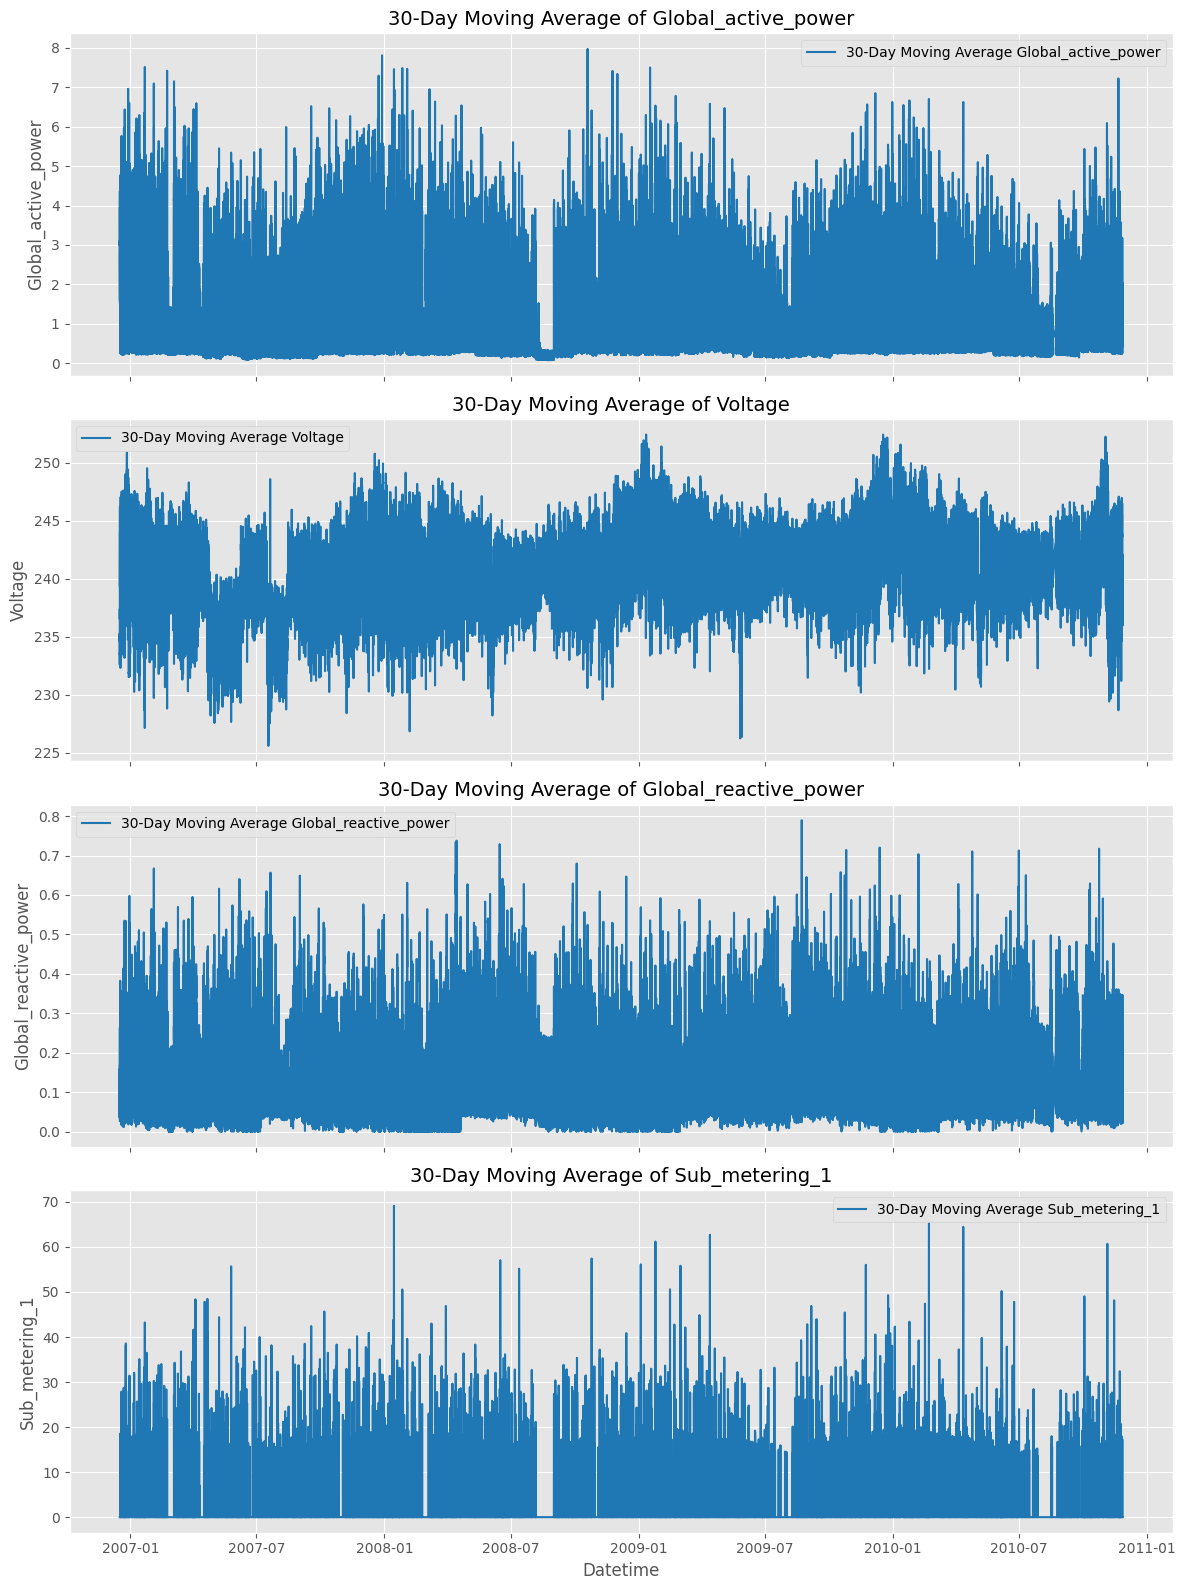

In [32]:
#build your line chart on the moving average here
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(12, 16), sharex=True)

for i, var in enumerate(variables_to_plot):
    axes[i].plot(moving_avg.index, moving_avg[var], label=f"30-Day Moving Average {var}", color='tab:blue')
    axes[i].set_title(f"30-Day Moving Average of {var}", fontsize=14)
    axes[i].set_ylabel(var)
    axes[i].legend()
    axes[i].grid(True)

# Configure the shared X-axis
axes[-1].set_xlabel('Datetime', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The moving average and the monthly average provide different perspectives on the data, each with its strengths.

- 30-Day Moving Average:

The moving average smooths out short-term fluctuations, offering a more detailed view of how the variable behaves on a day-to-day or hour-to-hour basis.
Since it takes into account a rolling window of 30 days, it adapts more quickly to changes in the data, showing trends and variations within a month.
This approach is useful for identifying short-term trends and patterns that might not be immediately visible in aggregated data.

- Monthly Average:

The monthly average aggregates data over an entire month, showing broad trends over time. It doesn't capture fine-grained details within each month.
This method is effective for understanding long-term seasonal trends and comparing how a variable behaves across different months and years (e.g., comparing June 2007 to June 2008).

##### Comparison and Effectiveness:
- Moving Average: More effective when we want to visualize the smoother, underlying trend without focusing solely on month-to-month variations. It's particularly useful for seeing how a variable behaves in response to shorter-term changes (e.g., fluctuations in daily energy consumption).
- Monthly Average: More effective when comparing long-term trends between months or years, and is simpler to interpret when we're looking for seasonality or large-scale patterns.
  
In summary, if we want to identify both short-term and long-term trends, the moving average is more effective for smoothing out daily variations and revealing ongoing patterns. On the other hand, if we're more focused on comparing how the variable behaves month-to-month (such as understanding monthly seasonality), the monthly average would be more appropriate. Both visualizations serve their purposes depending on the granularity of the trend we're looking to observe.









## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

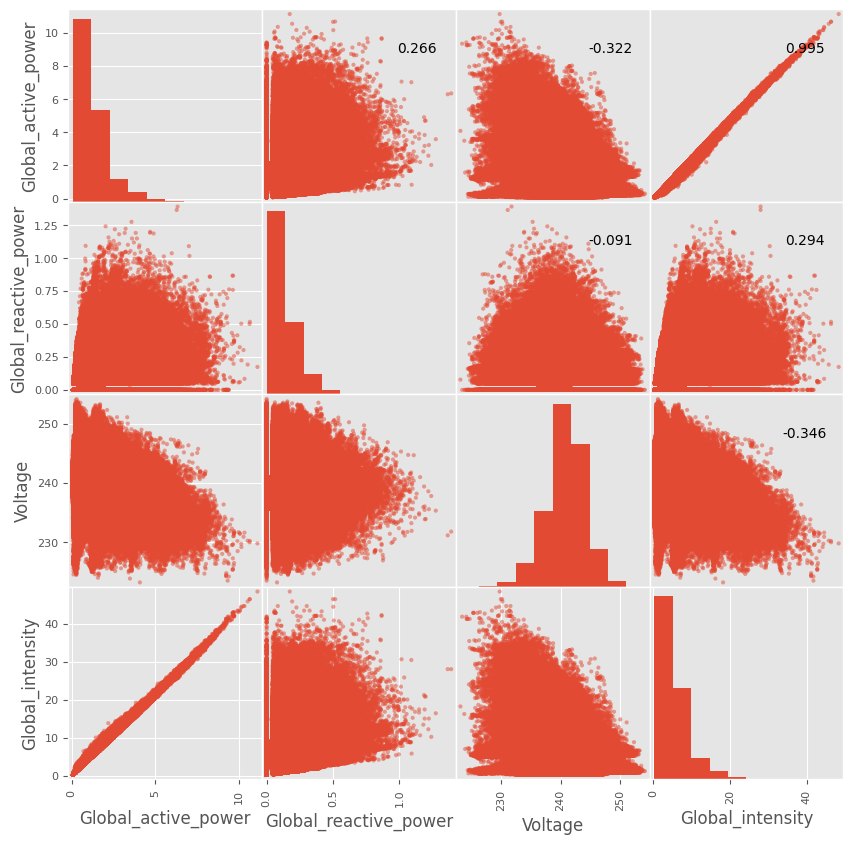

In [35]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:Patterns and Correlations Observed:
- Strong Correlations:

Global_active_power and Global_intensity are likely to show a strong positive correlation, as higher active power usage generally corresponds to higher current flow.
Global_active_power and Global_reactive_power might exhibit a moderate positive correlation, as both relate to total power usage but represent different components of it (active vs. reactive).

- Weak Correlations:

Voltage often has weaker or even negative correlations with other variables like Global_active_power or Global_intensity, as voltage in a power system is typically regulated and doesn't fluctuate significantly with changes in load.

- Non-linear Relationships:

The Spearman correlation coefficient captures monotonic relationships, which might reveal non-linear patterns that are not evident with Pearson's correlation. For example, Voltage might show a non-linear inverse relationship with Global_active_power, where voltage drops during high power loads.

#### Implications for Downstream Tasks:

- Feature Engineering:

Highly correlated variables, such as Global_active_power and Global_intensity, might provide redundant information. For models sensitive to multicollinearity (e.g., linear regression), dimensionality reduction techniques like PCA could be useful to combine these features into a single component.

- Model Selection:

The presence of non-linear relationships suggests that non-linear models (e.g., decision trees, random forests, or neural networks) might perform better than linear models when predicting target variables or understanding interactions.

- Variable Importance:

Weakly correlated features like Voltage may still carry important contextual information even if they don't strongly correlate with other variables. In predictive tasks, feature importance analysis can help assess their contribution to model performance.

- Interpretability:

Correlation information helps interpret the results of downstream models. For instance, if a variable strongly influences the target, the correlation matrix provides clues about potential causal relationships or confounding effects.

- Noise Handling:

Weak correlations or unexpected patterns might indicate noise or measurement errors in certain features, warranting data cleaning or further preprocessing.

In summary, understanding these correlations allows for better-informed decisions in feature selection, preprocessing, and model design, ensuring the downstream tasks effectively leverage the data's inherent structure.